<a href="https://colab.research.google.com/github/DavidT005/CUFICO_2019_2/blob/master/DavidParcial2Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. ROOT

Install packages needed for root

In [2]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

Mount the drive to get the root binary and untar it 

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [6]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 18 00:49 drive


Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
del sys #to free RAM

In [8]:
import ROOT

Welcome to JupyROOT 6.14/04


# 1. Histograma

## Ubicación de datos

In [9]:
%ls

drive/  root_build/  sample_data/


In [10]:
%cd drive/
%ls

/content/drive
'My Drive'/  'Shared drives'/


In [11]:
%cd Shared\ drives/
%ls

/content/drive/Shared drives
3erParcialClasica/  PyROOT_in_Google/


In [12]:
%cd PyROOT_in_Google/
%ls

/content/drive/Shared drives/PyROOT_in_Google
BasicAnalysis.ipynb       HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb         piano-C5.wav
Data5.root                Random2DHistos/
DatosParcial2/            root_build_google_yikes.tar
DatosResonancia.root      Temporal/
FFT_imagen.ipynb          TrimmedTree.root
FFT.ipynb                 TTreeExcercise.ipynb
FLUTEMI.WAV


In [13]:
%cd DatosParcial2/
%ls

/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2
N1017225699.root  N1036783619.root  N1041328785.root  N1152704745.root
N1017248532.root  N1037652810.root  N1044508251.root  N1152706893.root
N1017248976.root  N1037658939.root  N1045025129.root  N1214727927.root
N1020492516.root  N1037658970.root  N1152216721.root  N1214742154.root
N1036401107.root  N1037667562.root  N1152222545.root  N1233192753.root


## Carga de datos

In [14]:
DataChain = ROOT.TChain("SystemTree") #Este nombre se encontró con un TBrowser en una instalación local de ROOT
DataChain.Add("N1214742154.root")

1

In [15]:
DataChain

<ROOT.TChain object ("SystemTree") at 0x7e5b200>

In [16]:
N = DataChain.GetEntries()
print("The number of events is ",N)

The number of events is  80000


## Dibujo del histograma

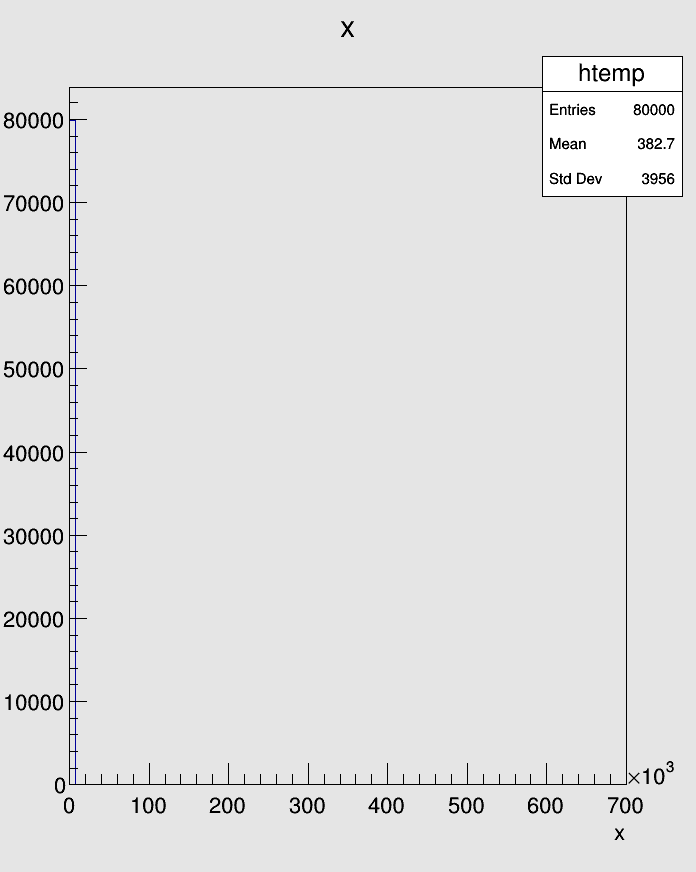

In [17]:
c1 = ROOT.TCanvas( 'c1', 'Data', 200, 10, 700, 900 )#Creates an empty space to graph
c1.SetFillColor( 18 )#makes the background gray
DataChain.Draw("x")
c1.Update()#draws the histogram in buffer
from ROOT import gROOT#Imports a pointer that allows getting information of everything that has been created using the ROOT library
gROOT.GetListOfCanvases().Draw()#Returns info on all the canvases that have been created and then it graphs them. We have already graphed but this allows graphing in the collab

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


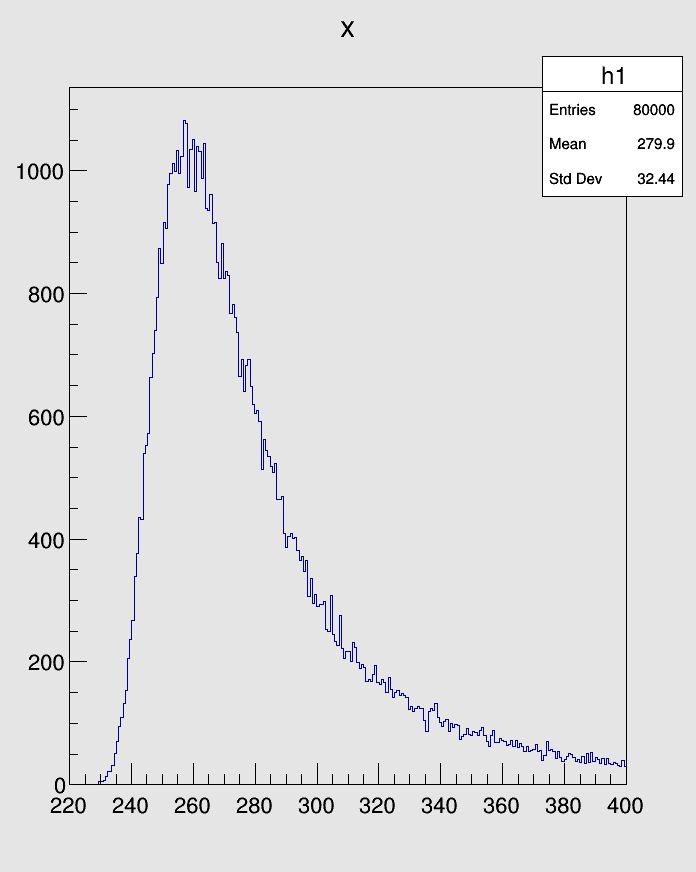

In [18]:
c1 = ROOT.TCanvas( 'c1', 'Data', 200, 10, 700, 900 )#Creates an empty space to graph
c1.SetFillColor( 18 )#makes the background gray
DataChain.Draw("x>>h1(250,220,400)")#Default upper limit by root is 700000
c1.Update()#draws the histogram in buffer
from ROOT import gROOT#Imports a pointer that allows getting information of everything that has been created using the ROOT library
gROOT.GetListOfCanvases().Draw()#Returns info on all the canvases that have been created and then it graphs them. We have already graphed but this allows graphing in the collab

In [0]:
mu_0 = 260 #Initial guess of "mean"
c_0 = 300-240 #Initial guess of "deviation"

# 2. Implementación de metropolis

## Definición de distribucion de Landau

In [0]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

We will write the Landau function and replicate the graph on wikipeida

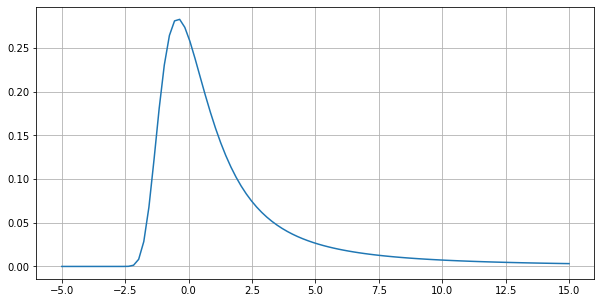

In [75]:
mu_test, c_test = 0, 1 #Test values for the landau distribution as stated on wikipedia

def landau_integrand(t, x, mu, c): #What is going to be integrated
  return (1 / (np.pi * c)) * np.exp(-t) * np.cos(t * ((x - mu) / c) + ((2 * t) / np.pi) * np.log(t / c))#Returns the integrand of the PDF


x_values = np.linspace(-5,15,100)#We study the probabilities of values between -5 and 15
p_vals = []
for x_i in x_values:
  p_vals.append(quad(landau_integrand, 0, np.inf, args = (x_i, mu_test, c_test))[0]) #We calculate the integral  from 0 to infinity

plt.figure(figsize = (10,5))
plt.plot(x_values,p_vals)

plt.grid()
plt.show()

Cabe resaltar que por errores de integración de scipy.integrate.quad() para valores muchos mayores a 15 la integral presenta valores que analiticamente no tienen sentido debido a que el integrando es un exponencial decreciente que multplica a coseno, que tiene valores entre 1 y -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  after removing the cwd from sys.path.


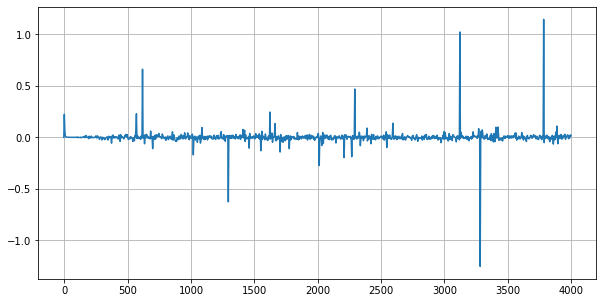

In [77]:
x_values = np.linspace(-5,4000,1000)#We study the probabilities of values between -5 and 15
p_vals = []
for x_i in x_values:
  p_vals.append(quad(landau_integrand, 0, np.inf, args = (x_i, mu_test, c_test))[0]) #We calculate the integral  from 0 to infinity

plt.figure(figsize = (10,5))
plt.plot(x_values,p_vals)

plt.grid()
plt.show()

Se intentó aumentar el parametro "limit" del integrador, lo cual disminuye estos errores a cambio de un gran aumento en el tiempo de computo, entonces la cola de la función no se va a considerar en el ajuste de los datos, esto se justifica en que por la forma de los datos y la función, si la colina se ajusta correctamente, debe de ser igual para la cola.

Now we will try to give it the shape of the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (6) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


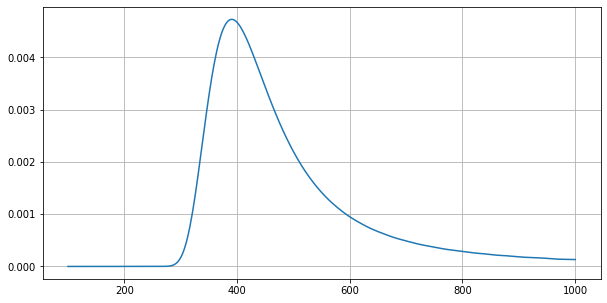

In [108]:
mu_test, c_test = mu_0, c_0 #Test values for the landau distribution as stated on wikipedia

def landau_integrand(t, x, mu, c): #What is going to be integrated
  return (1 / (np.pi * c)) * np.exp(-t) * np.cos(t * ((x - mu) / c) + ((2 * t) / np.pi) * np.log(t / c))#Returns the integrand of the PDF


x_values = np.linspace(100,1000,400)#We study the probabilities of values between 100 and 500
p_vals = []
for x_i in x_values:
  p_vals.append(quad(landau_integrand, 0, np.inf, args = (x_i, mu_test, c_test), limit = 6)[0]) #We calculate the integral  from 0 to infinity

plt.figure(figsize = (10,5))
plt.plot(x_values,p_vals)

plt.grid()
plt.show()

Notese que la forma de la distribución no coincide con lo esperado de los valores de $\mu$ y $c$, ya que estos no son media y desviacion, si no, parametro de posición y parametro de escala respectivamente.

Definamos la función como un todo y procedamos a implementar el método de Metropolis

In [117]:
mu_test, c_test = 0,1
def landau(x, mu = mu_test, c = c_test): #La función de landau
  return quad(landau_integrand, 0, np.inf, args = (x, mu, c),limit = 10)[0]
  

landau(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


0.2622401263777323

## Algoritmo de metropolis

In [0]:
def metropolis(distro,N,a,b): #Generates N random values following the distribution between a and b
  phi_0 = np.random.random() * (b - a) + a
  i = 0
  probs = np.array([])

  while (i < N):
    phi_prime = np.random.random() * (b - a) + a

    delta_s = -np.log(distro(phi_prime) / distro(phi_0) )

    if delta_s < 0:
      i += 1
      probs = np.append(probs,phi_prime)
      phi_0 = phi_prime
    
    else:
      prob = distro(phi_prime) / distro(phi_0) 
      if np.random.random() < prob :
        i += 1
        probs = np.append(probs,phi_prime)
        phi_0 = phi_prime

  return probs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


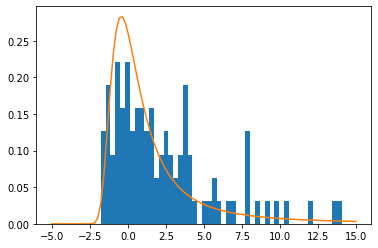

In [119]:
mu_test = 0
c_test = 1
Nrands = 100 #Reduced to shorten the execution time of the notebook.

a = metropolis(landau, Nrands,-5,15) #Genera numeros aleatorios entre -5 y 15 siguiendo la función de Landau, la cual usa implicitamente mu_test y c_test
plt.hist(a, 50, density = True)#Returns the normalized histogram


x_vals = np.linspace(-5,15,100)
p_vals = []
for x in x_vals:
  p_vals.append(landau(x))


plt.plot(x_vals,p_vals)


plt.show()

Para la grafica se puede apreciar que los valores sí siguen la distribución

## Paralelización de metrópolis

Desplazemonos a un directorio donde podamos crear archivos

In [26]:
%pwd

'/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2'

In [27]:
%cd /content/
%ls

/content
drive/  root_build/  sample_data/


In [28]:
try:
  %mkdir random_storage
  %cd random_storage/
except:
  %cd random_storage/

/content/random_storage


In [0]:
f = open("metro.py","w+")

Ahora escribimos escribimos la implementación del metodo de Metropolis en un archivo de python para poder correrlo varias veces en el fondo

In [0]:
'''
f.write('import sys\n')
f.write('print("mu is ", sys.argv[1])\n')
f.write('print("c is ", sys.argv[2])\n')
'''


f.write('import sys\n')
f.write('import numpy as np\n')
f.write('from scipy.integrate import quad\n')
f.write('import matplotlib.pyplot as plt\n')

f.write('def landau_integrand(t, x, mu, c):\n')
f.write('  return (1 / (np.pi * c)) * np.exp(-t) * np.cos(t * ((x - mu) / c) + ((2 * t) / np.pi) * np.log(t / c))\n')

f.write('mu_test = int(sys.argv[1])\n')
f.write('c_test = int(sys.argv[2])\n')
f.write('N = int(sys.argv[3])\n')

f.write('def landau(x, mu = mu_test, c = c_test):\n')
f.write('  return quad(landau_integrand, 0, np.inf, args = (x, mu, c), limit = 10)[0]\n')

f.write('def metropolis(distro,N,a,b): #a and b are the lower and upper limits respectively\n')
f.write('  phi_0 = np.random.random() * (b - a) + a\n')
f.write('  i = 0\n')
f.write('  probs = np.array([])\n')
f.write('  while (i < N):\n')
f.write('    phi_prime = np.random.random() * (b - a) + a\n')
f.write('    delta_s = -np.log(distro(phi_prime) / distro(phi_0) )\n')
f.write('    if delta_s < 0:\n')
f.write('      i += 1\n')
f.write('      probs = np.append(probs,phi_prime)\n')
f.write('      phi_0 = phi_prime\n')
f.write('    else:\n')
f.write('      prob = distro(phi_prime) / distro(phi_0) \n')
f.write('      if np.random.random() < prob :\n')
f.write('        i += 1\n')
f.write('        probs = np.append(probs,phi_prime)\n')
f.write('        phi_0 = phi_prime\n')
f.write('  return probs\n')

f.write('M = metropolis(landau, 500,220,900)\n')# Genera 500 puntos aleatorios entre 0 y 900
f.write('np.save("mu"+str(mu_test)+"c"+str(c_test)+"part"+str(N)+".npy",M)')
f.close()
del f

Ahora definimos una función que corra el script recien escrito varias veces en el fondo

In [0]:
import os

def parMetro(N, mu = mu_0, c = c_0):#produce N partes del conjunto de datos, cada una con 1000 datos
  for i in range(1,N+1): 
    print("Creating mu"+str(mu)+"c"+str(c)+"part"+str(i)+".npy in the background")
    os.system("python metro.py "+str(mu)+" "+str(c)+" "+str(i)+"&")


Ejecutamos la función con la cual 80000 valores toman alrededor de 11 minutos en lugar de una hora

In [33]:
'''TAKES 10:30 MINUTES'''
Nparts = 2
mu = mu_0
c = c_0
parMetro(Nparts)#160*500 = 80000

Creating mu260c60part1.npy in the background
Creating mu260c60part2.npy in the background


Escribimos una celda que revise continuamente si todos los scripts en segundo plano han terminado de ejecutar y no continue hasta que se cumpla esto.

In [0]:
Nparts = 2
mu = mu_0
c = c_0

while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

En esta celda creamos un archivo con todos los datos creados por cada script individual

In [36]:
import time

a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


In [0]:
fitArray = np.load("mu260c60FULL.npy")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 

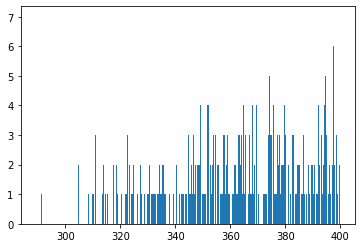

In [38]:
plt.hist(fitArray,1000)

# 3. Ajuste de datos

Notamos que en el intento anterior de replicar la distribución de datos, con $mu = 260$ obtuvimos una "media" de alrededor de $400$, como 260 es el 65% de 400, entonces usando esta relación proponemos $mu_1 = 169$ que es el 65% de 260

también notamos que función fue mas ancha que la distribución, por lo cual se recude c a un tercio de el valor anterior

In [0]:
mu_1 = 169
c_1 = 20

## Generación de distintas distribuciones

###

In [0]:
DataHist = ROOT.TH1F( 'DataHist', 'The histogram for the data', 10000, 0, 700000 )
dataArray = np.array([])

for entry in DataChain:
  dataArray = np.append(dataArray,entry.x)

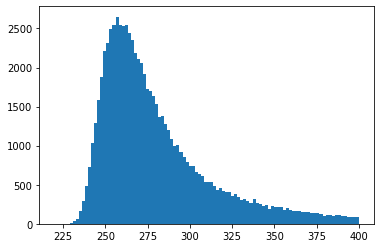

In [41]:
plt.hist(dataArray,100, range = (220,400))
plt.show()

A continuación hacemos un ajuste a mano de la función de landau a los datos

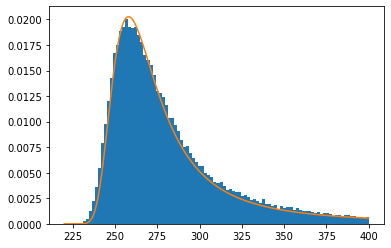

In [63]:
plt.hist(dataArray,100, range = (220,400),density = True)

x_vals = np.linspace(220,400,1000)
p_vals = []
for x in x_vals:
  p_vals.append(landau(x,240.5,14))



plt.plot(x_vals,p_vals)

plt.show()

Luego de graficas varias veces a mano, deducimos que unos buenos valores para comenzar a estudiar las variaciones de $\chi^2$ con los parametros es $mu = 240.5$ y $c = 14$

Revisemos a partir de que valores comienza a aparecer ruido en la función

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  This is separate from the ipykernel package so we can avoid doing imports until


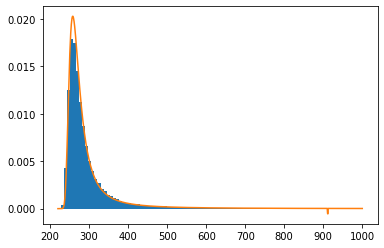

In [65]:
plt.hist(dataArray,100, range = (220,1000),density = True)

x_vals = np.linspace(220,1000,1000)
p_vals = []
for x in x_vals:
  p_vals.append(landau(x,240.5,14))



plt.plot(x_vals,p_vals)

plt.show()

Según esta grafica, haremos el fitting de datos hasta $x = 900$

## Definición de $\chi^2/ndf$

In [0]:
def get_chi_squared_over_ndf(fit,data,number_bins): #Recives two arrays and calculates the chiSquared between them
  fit = np.histogram(fit)[0]
  data = np.histogram(data)[0]

  chi_squared = 0 #sets the initial value of chi as zero
  for i in range(0,number_bins):#iterates over al the posible indexes of the histograms except the fall-offs
    chi_squared += ((data[i] - fit[i]) ** 2) / data[i]#Calculates what must be added to the sum
  
  return chi_squared / number_bins#returns chi squared

## Fitting

Debido a lo explicado anteriormente, no vamos a considerar en el fitting los datos con $x > 900$, por lo cual generaremos sólo la misma cantidad de numeros aleatorios para un par $\mu$ y $c$ que haya de eventos con $x < 900$

In [99]:
auxData = dataArray[dataArray < 900]
print(auxData.size)

78653


Debido a que aproximadamente 79000 de los 80000 datos están por debajo del valor 900, la omisión de estos datos para corregir los errores de integración es justa.

En el ajuste manual que se realizó posteriormente se notó que la variación cerca a los valores de $\mu$ y $c$ tomados es lo suficientemente grande para que variaciones de una unidad afecten ajuste, adicionalmente cada dato se demora alrededor de 10 minutos para correr, entonces con esta cantidad de datos se necesitan 90+ minutos de computo, por lo cual se decide no aumentar más.

### Production of random data

In [0]:
mu_vect = np.arange(mu_1-1,mu_1+2,1)
c_vect = np.arange(c_1-1,mu_1+2,1)
Nparts = 2 #158*500 = 79000

In [126]:

parMetro(Nparts,mu_vect[0],c_vect[0])#160*500 = 80000

Creating mu168c19part1.npy in the background
Creating mu168c19part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [128]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [130]:

parMetro(Nparts,mu_vect[0],c_vect[1])#160*500 = 80000

Creating mu168c20part1.npy in the background
Creating mu168c20part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [132]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [133]:

parMetro(Nparts,mu_vect[0],c_vect[2])#160*500 = 80000

Creating mu168c21part1.npy in the background
Creating mu168c21part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [135]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [136]:

parMetro(Nparts,mu_vect[1],c_vect[0])#160*500 = 80000

Creating mu169c19part1.npy in the background
Creating mu169c19part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [138]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [139]:

parMetro(Nparts,mu_vect[1],c_vect[1])#160*500 = 80000

Creating mu169c20part1.npy in the background
Creating mu169c20part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [141]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [142]:

parMetro(Nparts,mu_vect[1],c_vect[2])#160*500 = 80000

Creating mu169c21part1.npy in the background
Creating mu169c21part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [144]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [147]:

parMetro(Nparts,mu_vect[2],c_vect[0])#160*500 = 80000

Creating mu170c19part1.npy in the background
Creating mu170c19part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [149]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [150]:

parMetro(Nparts,mu_vect[2],c_vect[1])#160*500 = 80000

Creating mu170c20part1.npy in the background
Creating mu170c20part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [152]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


### Production of random data

In [153]:

parMetro(Nparts,mu_vect[2],c_vect[2])#160*500 = 80000

Creating mu170c21part1.npy in the background
Creating mu170c21part2.npy in the background


In [0]:
while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy"):
  continue

In [155]:
a = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy", allow_pickle = True)
#os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(Nparts)+".npy")
for j in reversed(range(1, Nparts)):

  while False == os.path.isfile("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy"):
    continue
  time.sleep(10/Nparts)
  b = np.load("mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy", allow_pickle = True)
  a = np.append(a,b)
  #os.system("rm mu"+str(mu)+"c"+str(c)+"part"+str(j)+".npy")
  
np.save("mu"+str(mu)+"c"+str(c)+"FULL.npy",a)
print(a.size," events generated sucessfully")

1000  events generated sucessfully


Now we get the values of Chi-Squared

In [157]:
chiS = []
for mu in mu_vect:
  for c in c_vect:
    fitArray = np.load("mu"+str(mu)+"c"+str(c)+"FULL.npy")
    chiS.append(get_chi_squared_over_ndf(fitArray,dataArray,1000))

FileNotFoundError: ignored

In [0]:
plt.scatter(np.arange(1,10,1),chiS)

In [162]:
%ls *FULL.npy

mu260c60FULL.npy
